# How to make a DL Model


Creating a Deep Learning (DL) model involves several steps, including data preparation, model design, model training, and evaluation. Below is a step-by-step guide on how to build a DL model for image classification using TensorFlow/Keras:


## Step 1: Data Collection and Preparation

Choose a dataset for your image classification task. For example, you can use CIFAR-10 as mentioned earlier.
Split the dataset into training and testing sets. Ensure that you have a sufficient amount of data for each class to avoid class imbalance issues.
Preprocess the images by resizing them to a consistent size (e.g., 32x32 pixels), normalizing the pixel values to [0, 1], and one-hot encoding the class labels if needed.

# CIFAR-10 IMAGES CLASSIFICATION

CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:

1. Airplanes
2. Cars
3. Birds
4. Cats
5. Deer
6. Dogs
7. Frogs
8. Horses
9. Ships
10. Trucks

The dataset stands for the Canadian Institute For Advanced Research (CIFAR)

CIFAR-10 is widely used for machine learning and computer vision applications.

The dataset consists of 60,000 32x32 color images and 6,000 images of each class.

Images have low resolution (32x32).

## Step 2: Model Design

Import the necessary libraries

In [1]:
import tensorflow as tf

# Display the version
print(tf.__version__)	

# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard


2.10.0


- Input: This layer is used to define the input shape of the neural network. It specifies the shape of the input data that will be fed into the model.

- Conv2D: This layer represents a 2D convolutional layer in a Convolutional Neural Network (CNN). It performs convolutions on the input image to extract features.

- Dense: This layer represents a fully connected (dense) layer. It connects every neuron from the previous layer to every neuron in the current layer.
- Flatten: This layer is used to flatten the output of a convolutional layer or pooling layer into a 1D array before feeding it into a dense layer.
- Dropout: This layer applies dropout regularization to the input, which randomly sets a fraction of input units to 0 during training to prevent overfitting.
- GlobalMaxPooling2D: This layer performs global max-pooling over the spatial dimensions of the input feature map. It reduces the spatial dimensions to a single value by taking the maximum value in each feature map.
- MaxPooling2D: This layer performs max-pooling over the spatial dimensions of the input feature map. It reduces the spatial dimensions while retaining important features.
- BatchNormalization: This layer normalizes the activations of the previous layer, which helps in stabilizing and accelerating the training process.
- Model: This class is used to define a Keras model. It allows you to define the input and output layers and create a computational graph for training and inference.


In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


# Data Visualization

569
[5]


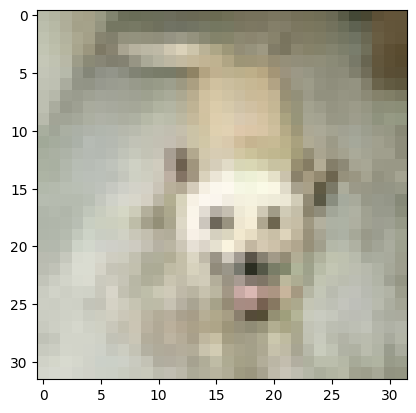

In [3]:
i = int(input())
plt.imshow(x_train[i])
print(y_train[i])

3224
[6]


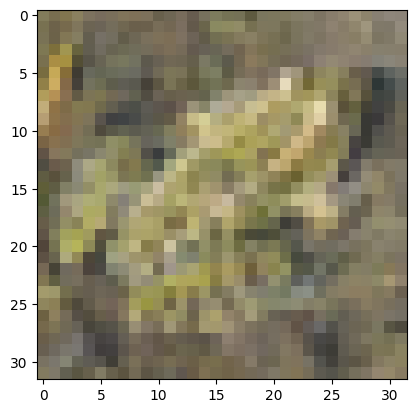

In [5]:
j = int(input())
plt.imshow(x_test[j])
print(y_test[j])

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1242: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


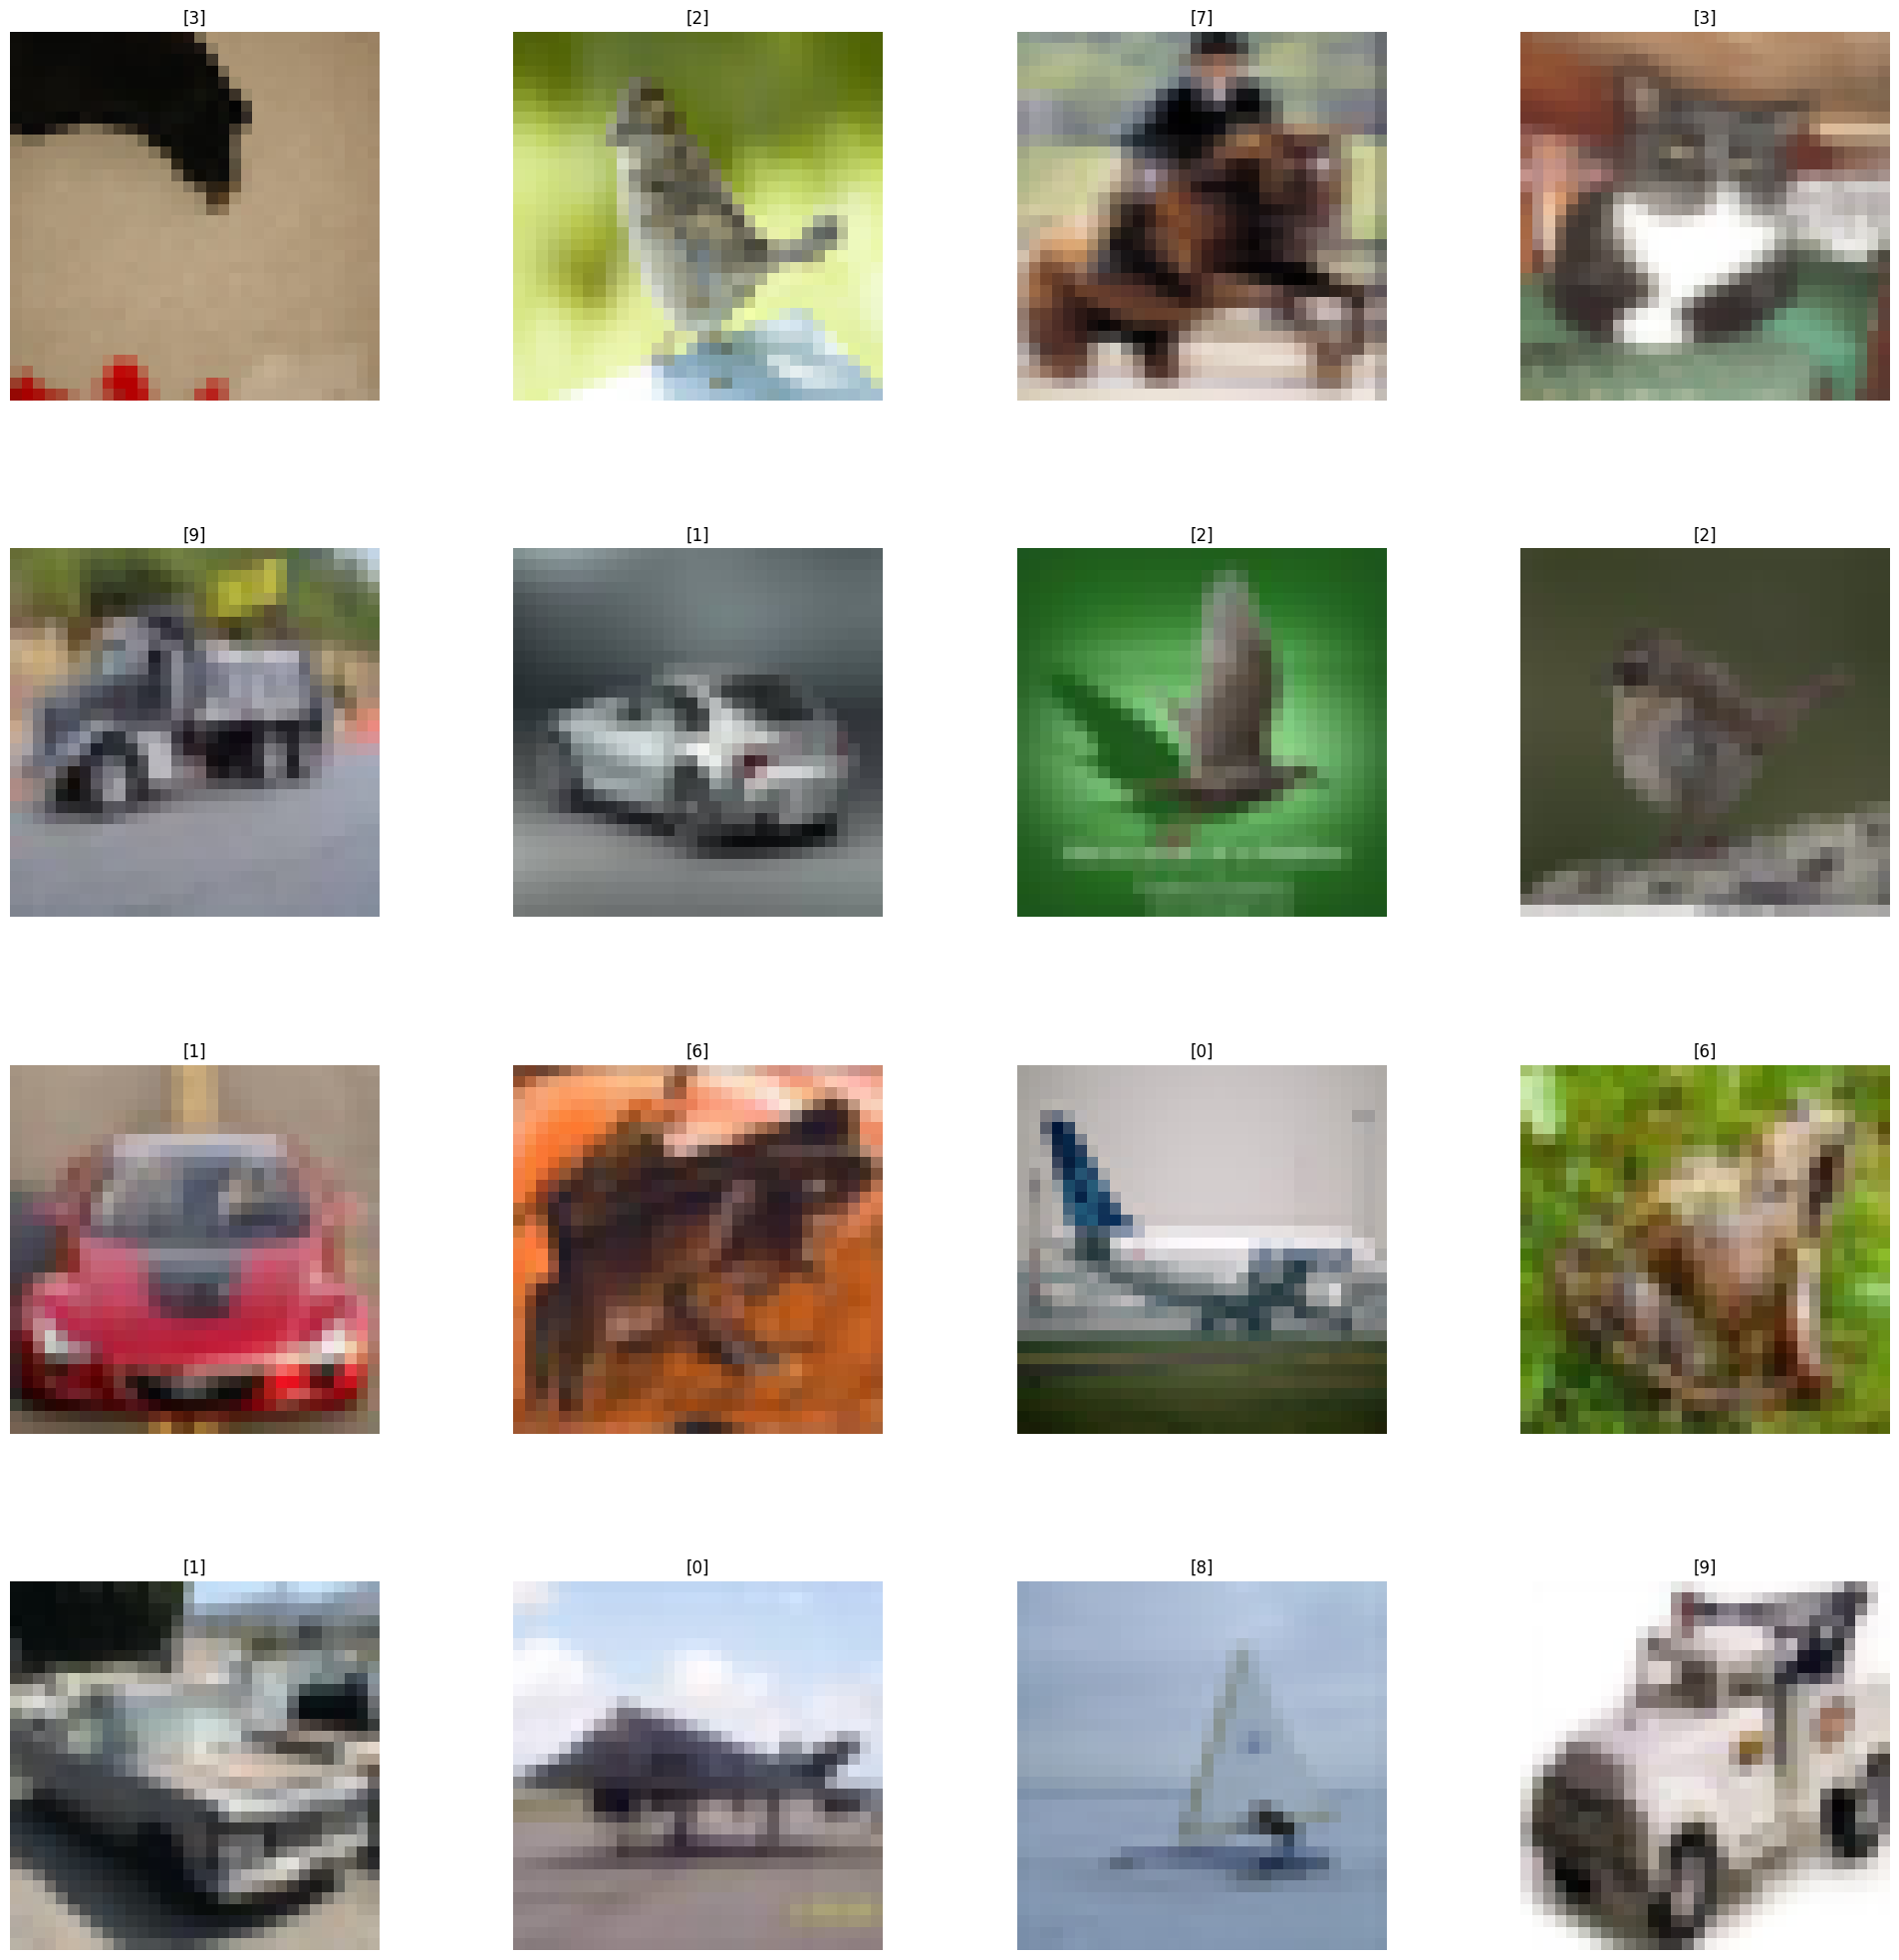

In [6]:
W_grid = 4
L_grid = 4
#variables define the number of columns (W_grid) and rows (L_grid) in the subplot grid.

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(x_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [8]:
n_training

50000

## Data Preprocessing

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [10]:
num_cat = 10

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
import keras
y_train = keras.utils.to_categorical(y_train,num_cat)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
y_test = keras.utils.to_categorical(y_test,num_cat)

In [15]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [16]:
x_train = x_train/255
x_test = x_test/255

In [17]:
x_train.shape

(50000, 32, 32, 3)

In [18]:
Input_shape = x_train.shape[1:]

In [19]:
Input_shape

(32, 32, 3)

## Train the model

In [20]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=Input_shape))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))

In [21]:
cnn_model.add(Dropout(0.4))

In [22]:
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

In [23]:
cnn_model.add(Flatten())

In [24]:
cnn_model.add(Dense(units=1024, activation='relu'))

In [25]:
cnn_model.add(Dense(units=1024, activation='relu'))

In [26]:
cnn_model.add(Dense(units=10, activation='softmax'))

In [27]:
cnn_model.compile(loss = 'categorical_crossentropy', 
                  optimizer = keras.optimizers.RMSprop(lr = 0.001), 
                  metrics = ['accuracy'])

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = cnn_model.fit(x_train, y_train, batch_size = 32, epochs = 10, shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 224s 143ms/step - loss: 1.6012 - accuracy: 0.4233
Epoch 2/10
 217/1563 [===>..........................] - ETA: 3:11 - loss: 1.2693 - accuracy: 0.5678

## Evauluate the Model

In [ ]:
evaluation = cnn_model.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

In [ ]:
predicted_classes = cnn_model.predict(x_test) 
predicted_classes

In [ ]:
predicted_classes = np.argmax(predicted_classes, axis=1)

In [ ]:
predicted_classes

In [ ]:
y_test

In [ ]:
y_test = y_test.argmax(1)

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (25, 25))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
cm = confusion_matrix(y_test,predicted_classes)
cm

In [ ]:
plt.figure(figsize =(10,10))
sns.heatmap(cm,annot = True)

## Saving the Model

In [ ]:
import os
directory = os.path.join(os.getcwd(),'saved_model')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'kers_cifar10_trained_model.h5')
cnn_model.save(model_path)

In [ ]:
# Load the trained model
loaded_model = tf.keras.models.load_model(model_path)


In [ ]:
import requests
from PIL import Image
from io import BytesIO
# Define the URL of the test image
url = 'https://t2.gstatic.com/licensed-image?q=tbn:ANd9GcQdAnprsidzbOSZ4jI1SvcFeIEuFKwBLrILGo8tLCEA4ixMzfxUQfk6onBDhipea4sD'
# Download the image from the URL
response = requests.get(url)

# Check if the image was successfully downloaded
if response.status_code == 200:
    # Load the image using PIL
    test_image = Image.open(BytesIO(response.content))
    test_image = test_image.resize((32, 32))  # Resize to the input size of the model
    test_image_array = np.array(test_image) / 255.0  # Normalize the pixel values
    test_image_array = np.expand_dims(test_image_array, axis=0)  # Add a batch dimension

    # Now, you can use the loaded_model to make predictions on the test_image_array
    predicted_classes = loaded_model.predict(test_image_array)
    predicted_class_index = np.argmax(predicted_classes[0])

    # Map the predicted class index to the corresponding class label
    class_labels = ['Airplanes', 'Cars', 'Birds', 'Cats', 'Deer', 'Dogs', 'Frogs', 'Horses', 'Ships', 'Trucks']
    predicted_class_label = class_labels[predicted_class_index]
    
    # Print the predicted class label
    print(f"Predicted Class: {predicted_class_label}")
else:
    print("Error downloading the image from the URL.")
